In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df = pd.read_csv('scout.csv', sep='\t')
df

,Team,Round,Position,Leave,Auto Speaker,Auto Amp,Tele Speaker,Tele Amp,Stage,Trap,Defense,Disabled,Rating,Penalties,Red Flag,Yellow Flag,Notes,Scout
0,4925,1,"""Blue Top""",1,4,3,2,1,3,1,1,1,2,6,1,1,Heqoooo,Oliver
1,1,2,"""Blue Bottom""",0,6,4,4,0,5,1,1,0,2,2,0,0,Hewpoo,Oliver
2,4925,5,"""Red Middle""",0,8,7,4,4,1,0,1,0,3,8,0,1,Hooo,Oliver
3,4925,5,"""Red Middle""",0,8,7,4,4,1,0,1,0,3,8,0,1,Hooo,Oliver
4,5,5,"""Red Bottom""",1,10,5,0,4,0,0,1,1,1,2,1,1,Hooo,Oliver
5,3,5,"""Red Top""",0,6,2,1,2,0,1,0,0,2,5,0,0,Hooo,Oliver
6,3,5,"""Red Top""",1,4,3,3,3,0,1,0,0,2,5,0,0,Hooo,Oliver
7,4,5,"""Red Bottom""",0,6,1,3,1,5,0,1,1,3,6,1,1,Hooo,Oliver


In [3]:
df1 = df.loc[:, df.columns != 'Position']
df2 = df1.loc[:, df1.columns != 'Notes']
df3 = df2.loc[:, df2.columns != 'Scout']

In [4]:
df3

,Team,Round,Leave,Auto Speaker,Auto Amp,Tele Speaker,Tele Amp,Stage,Trap,Defense,Disabled,Rating,Penalties,Red Flag,Yellow Flag
0,4925,1,1,4,3,2,1,3,1,1,1,2,6,1,1
1,1,2,0,6,4,4,0,5,1,1,0,2,2,0,0
2,4925,5,0,8,7,4,4,1,0,1,0,3,8,0,1
3,4925,5,0,8,7,4,4,1,0,1,0,3,8,0,1
4,5,5,1,10,5,0,4,0,0,1,1,1,2,1,1
5,3,5,0,6,2,1,2,0,1,0,0,2,5,0,0
6,3,5,1,4,3,3,3,0,1,0,0,2,5,0,0
7,4,5,0,6,1,3,1,5,0,1,1,3,6,1,1


In [5]:
dfM = df3.groupby(['Team'])[['Team', 'Leave', 'Auto Speaker', 'Auto Amp', 'Tele Speaker', 'Tele Amp', 'Stage', 'Trap']].mean()

In [6]:
dfM['Predicted Scoring'] = dfM['Tele Amp'] + 2*dfM['Leave'] + 2*dfM['Auto Amp'] + 2*dfM['Tele Speaker'] + 5*dfM['Auto Speaker'] + dfM['Stage'] + 5*dfM['Trap']

In [7]:
sorted_df = dfM.sort_values(by=['Predicted Scoring'], ascending=False)

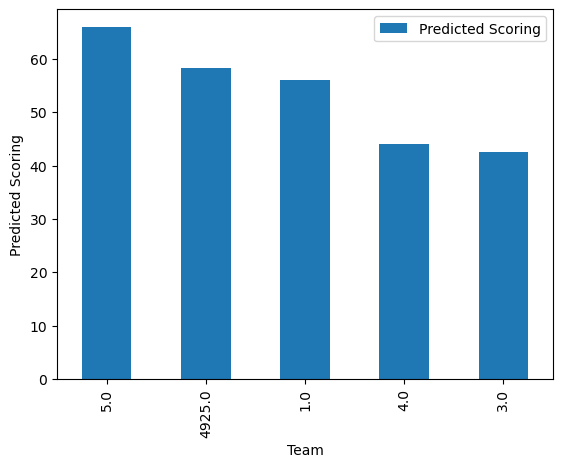

In [8]:
plotS = sorted_df.plot(kind='bar', x='Team', y='Predicted Scoring', xlabel='Team', ylabel='Predicted Scoring')

In [9]:
dfR=df3.groupby(['Team'])[['Defense', 'Disabled', 'Red Flag']].sum()

In [10]:
dfR['Team'] = df3.groupby(['Team'])['Team'].mean()
dfR['Penalties'] = df3.groupby(['Team'])['Penalties'].mean()
dfR['Rating'] = df3.groupby(['Team'])['Rating'].mean()
dfR['Yellow Flag'] = df3.groupby(['Team'])['Yellow Flag'].mean()

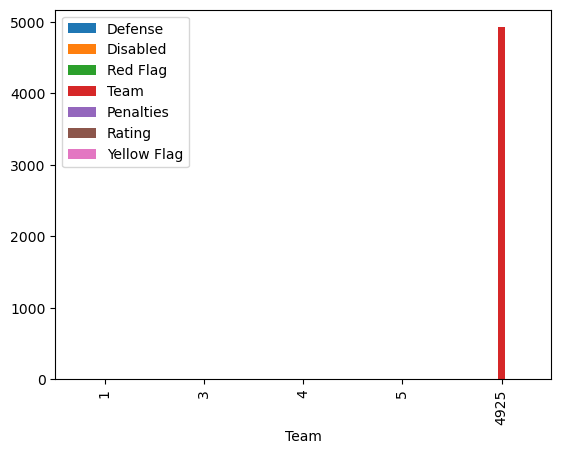

In [11]:
plotR = dfR.plot(kind='bar')

In [12]:
dfR

,Defense,Disabled,Red Flag,Team,Penalties,Rating,Yellow Flag
Team,,,,,,,
1,1,0,0,1.0,2.000000,2.000000,0.0
3,0,0,0,3.0,5.000000,2.000000,0.0
4,1,1,1,4.0,6.000000,3.000000,1.0
5,1,1,1,5.0,2.000000,1.000000,1.0
4925,3,1,1,4925.0,7.333333,2.666667,1.0


In [13]:
dfM['Rank']= dfM['Predicted Scoring'] - 25*dfR['Disabled'] - 25*dfR['Red Flag'] - 10*dfR['Yellow Flag'] - 4*dfR['Defense'] - dfR['Penalties'] + 5*dfR['Rating']

In [14]:
dfM['Rank']

Team
1       60.000000
3       47.500000
4      -11.000000
5        5.000000
4925    -7.666667
Name: Rank, dtype: float64

In [15]:
sorted_rank = dfM.sort_values(by=['Rank'], ascending=False)
sorted_rank

,Team,Leave,Auto Speaker,Auto Amp,Tele Speaker,Tele Amp,Stage,Trap,Predicted Scoring,Rank
Team,,,,,,,,,,
1,1.0,0.000000,6.000000,4.000000,4.000000,0.0,5.000000,1.000000,56.000000,60.000000
3,3.0,0.500000,5.000000,2.500000,2.000000,2.5,0.000000,1.000000,42.500000,47.500000
5,5.0,1.000000,10.000000,5.000000,0.000000,4.0,0.000000,0.000000,66.000000,5.000000
4925,4925.0,0.333333,6.666667,5.666667,3.333333,3.0,1.666667,0.333333,58.333333,-7.666667
4,4.0,0.000000,6.000000,1.000000,3.000000,1.0,5.000000,0.000000,44.000000,-11.000000


In [16]:
dfR

,Defense,Disabled,Red Flag,Team,Penalties,Rating,Yellow Flag
Team,,,,,,,
1,1,0,0,1.0,2.000000,2.000000,0.0
3,0,0,0,3.0,5.000000,2.000000,0.0
4,1,1,1,4.0,6.000000,3.000000,1.0
5,1,1,1,5.0,2.000000,1.000000,1.0
4925,3,1,1,4925.0,7.333333,2.666667,1.0


In [17]:
sorted_rank

,Team,Leave,Auto Speaker,Auto Amp,Tele Speaker,Tele Amp,Stage,Trap,Predicted Scoring,Rank
Team,,,,,,,,,,
1,1.0,0.000000,6.000000,4.000000,4.000000,0.0,5.000000,1.000000,56.000000,60.000000
3,3.0,0.500000,5.000000,2.500000,2.000000,2.5,0.000000,1.000000,42.500000,47.500000
5,5.0,1.000000,10.000000,5.000000,0.000000,4.0,0.000000,0.000000,66.000000,5.000000
4925,4925.0,0.333333,6.666667,5.666667,3.333333,3.0,1.666667,0.333333,58.333333,-7.666667
4,4.0,0.000000,6.000000,1.000000,3.000000,1.0,5.000000,0.000000,44.000000,-11.000000


C:\Users\4925\AppData\Local\Temp\ipykernel_8416\1254131059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_rank['Disability'] = sorted_rank['Predicted Scoring'] - sorted_rank['Rank']


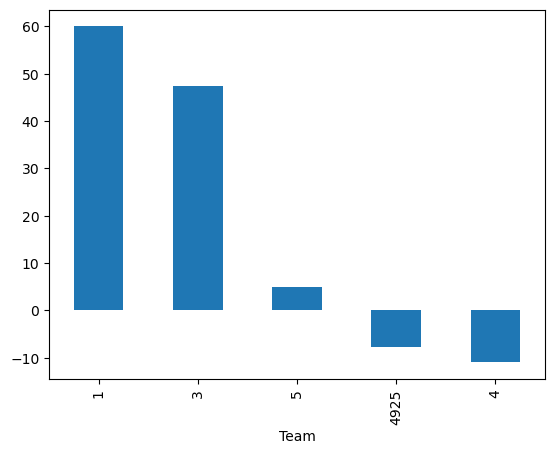

In [18]:
plotSR = sorted_rank['Rank'].plot(kind='bar')
sorted_rank = sorted_rank[['Rank', 'Team', 'Predicted Scoring']]
sorted_rank['Disability'] = sorted_rank['Predicted Scoring'] - sorted_rank['Rank']

In [19]:
sorted_rank

,Rank,Team,Predicted Scoring,Disability
Team,,,,
1,60.000000,1.0,56.000000,-4.0
3,47.500000,3.0,42.500000,-5.0
5,5.000000,5.0,66.000000,61.0
4925,-7.666667,4925.0,58.333333,66.0
4,-11.000000,4.0,44.000000,55.0


In [20]:
plotR.get_figure().savefig('PredictedScore.pdf', format='pdf')
plotS.get_figure().savefig('MISCData.pdf', format='pdf')
plotSR.get_figure().savefig('Choice.pdf', format='pdf')
sorted_rank.to_csv('Results.csv')